histogram_equalization



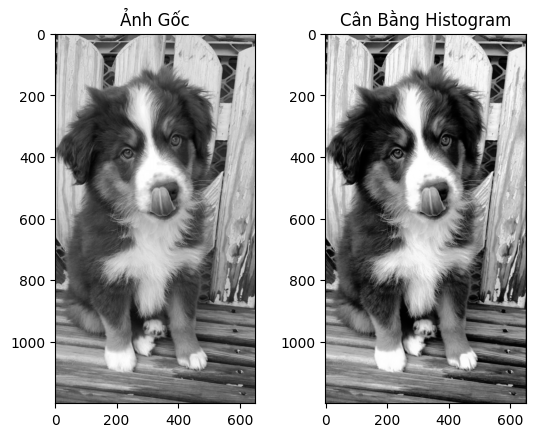

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path):
    # Đọc ảnh từ đường dẫn
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Kiểm tra xem ảnh có tồn tại không
    if image is None:
        print("Không thể đọc được ảnh.")
        return

    # Thực hiện cân bằng histogram
    equalized_image = cv2.equalizeHist(image)

    # Hiển thị ảnh gốc và ảnh đã cân bằng histogram
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Ảnh Gốc')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Cân Bằng Histogram')

    plt.show()

# Đường dẫn của ảnh
image_path = '/content/histogram_equalization.jpg'  # Thay đổi đường dẫn của ảnh thực tế

# Gọi hàm để thực hiện cân bằng histogram
histogram_equalization(image_path)


Âm bản

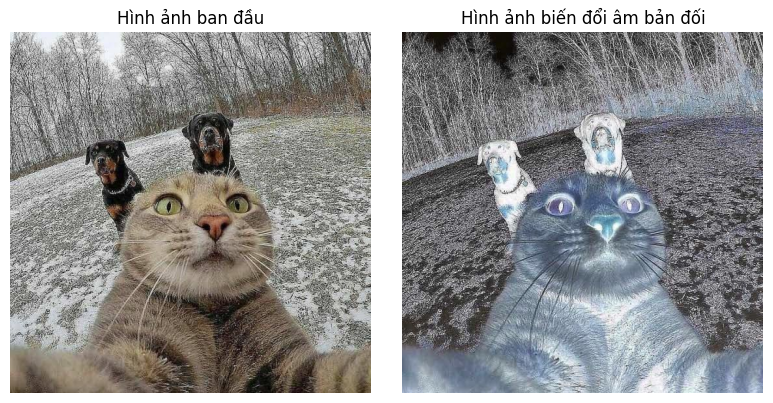

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def negative_transform(img):
    try:
        # Lấy kích thước ảnh
        width, height = img.size

        # Duyệt qua từng pixel và thực hiện phép biến đổi âm bản đối
        for y in range(height):
            for x in range(width):
                # Lấy giá trị pixel
                current_color = img.getpixel((x, y))

                # Tính giá trị âm bản đối
                new_color = tuple(255 - value for value in current_color)

                # Đặt lại giá trị pixel mới
                img.putpixel((x, y), new_color)

        # Lưu hình ảnh mới
        return img

    except Exception as e:
        print(f"Lỗi: {e}")

def plot(image_path):
    try:
        # Đọc hình ảnh
        img = Image.open(image_path)

        # Hiển thị hình ảnh ban đầu
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title('Hình ảnh ban đầu')
        plt.imshow(img)
        plt.axis('off')

        # Thực hiện phép biến đổi âm bản đối
        img = negative_transform(img)

        # Hiển thị hình ảnh biến đổi
        plt.subplot(1, 2, 2)
        plt.title('Hình ảnh biến đổi âm bản đối')
        plt.imshow(img)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Lỗi: {e}")

# Thực hiện phép biến đổi âm bản đối và hiển thị hình ảnh
plot("/content/am_ban.jpg")

Biến đổi Logarith

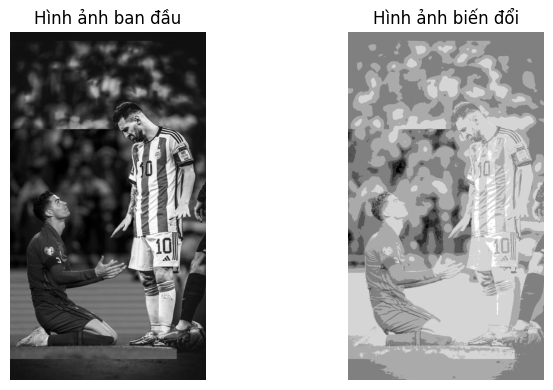

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def transform(img,c):
    # Lấy kích thước ảnh
    width, height = img.size

    # Duyệt qua từng pixel và thực hiện
    for y in range(height):
        for x in range(width):
            # Lấy giá trị pixel
            current_color = img.getpixel((x, y))

            # Tính giá trị mới
            new_color = round(c*np.log(1+current_color))

            # Đặt lại giá trị pixel mới
            img.putpixel((x, y), new_color)

    # Lưu hình ảnh mới
    return img

def plot(image_path,c=1):
    # Đọc hình ảnh
    img = Image.open(image_path)
    img = img.convert('L')

    # Hiển thị hình ảnh ban đầu
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Hình ảnh ban đầu')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Thực hiện phép biến đổi
    img = transform(img,c)

    # Hiển thị hình ảnh biến đổi
    plt.subplot(1, 2, 2)
    plt.title('Hình ảnh biến đổi')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

plot("/content/bien_doi_logarith.jpg", c=1)

Hàm mũ

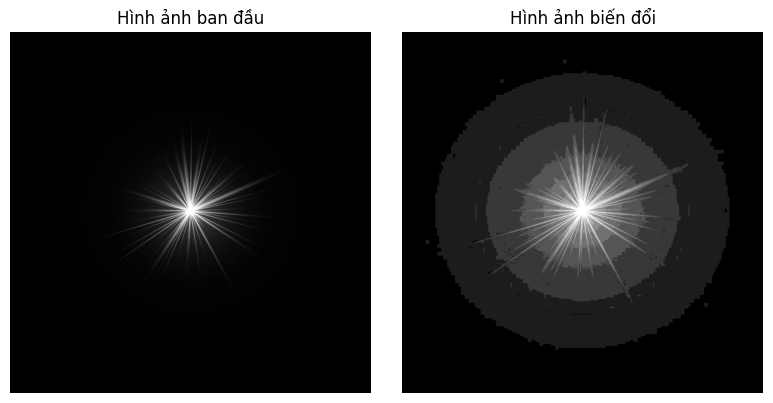

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def transform(img,c,mu):
    # Lấy kích thước ảnh
    width, height = img.size

    # Duyệt qua từng pixel và thực hiện
    for y in range(height):
        for x in range(width):
            # Lấy giá trị pixel
            current_color = img.getpixel((x, y))

            # Tính giá trị mới
            new_color = round(c*(current_color**mu))

            # Đặt lại giá trị pixel mới
            img.putpixel((x, y), new_color)

    # Lưu hình ảnh mới
    return img

def plot(image_path,c=1,y=0.6):
    # Đọc hình ảnh
    img = Image.open(image_path)
    img = img.convert('L')

    # Hiển thị hình ảnh ban đầu
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Hình ảnh ban đầu')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    # Thực hiện phép biến đổi
    img = transform(img,c,y)

    # Hiển thị hình ảnh biến đổi
    plt.subplot(1, 2, 2)
    plt.title('Hình ảnh biến đổi')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

plot("/content/ham_mu.jpg", c=1,y=0.4)

Phép co

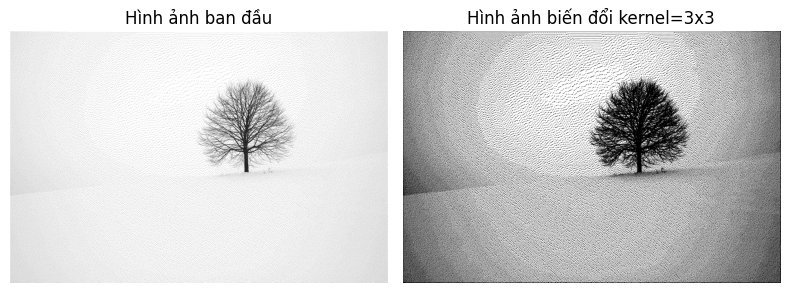

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

input_image=Image.open("/content/phep_co.jpg").convert('1')
width, height = input_image.size

# Kernel
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# Ảnh đen trắng (một ma trận 2D)
image = np.array(input_image)
[rows, columns] = np.shape(image)
result = np.zeros(shape=(rows, columns))

for i in range(1,height-2):
    for j in range(1,width-2):
        if(image[i,j-1]==1 and image[i-1,j]==1 and image[i,j]==1 and image[i+1,j]==1 and image[i,j+1]==1):
            result[i,j]=1

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Hình ảnh ban đầu')
plt.imshow(input_image,cmap='gray')
plt.axis('off')

# Hiển thị hình ảnh biến đổi
plt.subplot(1, 2, 2)
plt.title(f'Hình ảnh biến đổi kernel=3x3')
plt.imshow(result,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Phép giãn

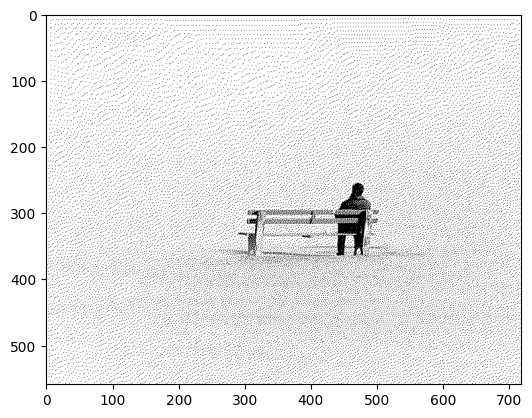

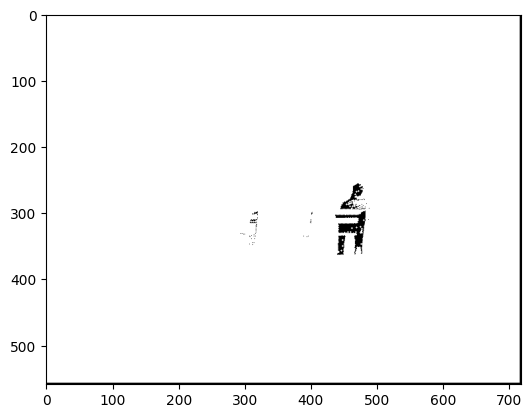

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

input_image=Image.open("/content/phep_gian.jpg").convert('1')
width, height = input_image.size

# Kernel
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# Ảnh đen trắng (một ma trận 2D)
image = np.array(input_image)
[rows, columns] = np.shape(image)
result = np.zeros(shape=(rows, columns))

for i in range(1,height-2):
    for j in range(1,width-2):
        if(image[i,j-1]==1 or image[i-1,j]==1 or image[i,j]==1 or image[i+1,j]==1 or image[i,j+1]==1):
            result[i,j]=1

plt.imshow(input_image,cmap='gray')
plt.show()

plt.imshow(result,cmap='gray')

plt.show()

Phân ngưỡng

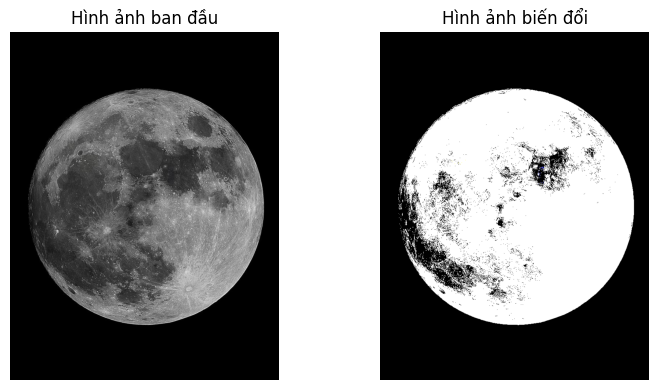

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def transform(img):
    try:
        # Lấy kích thước ảnh
        width, height = img.size

        # Duyệt qua từng pixel và thực hiện phân ngưỡng
        for y in range(height):
            for x in range(width):
                # Lấy giá trị pixel
                current_color = img.getpixel((x, y))

                # Tính giá trị ngưỡng
                new_color = tuple(0 if value <= 50 else 255 for value in current_color)


                # Đặt lại giá trị pixel mới
                img.putpixel((x, y), new_color)

        # Lưu hình ảnh mới
        return img

    except Exception as e:
        print(f"Lỗi: {e}")

def plot(image_path):
    try:
        # Đọc hình ảnh
        img = Image.open(image_path)

        # Hiển thị hình ảnh ban đầu
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title('Hình ảnh ban đầu')
        plt.imshow(img)
        plt.axis('off')

        # Thực hiện phép biến đổi
        img = transform(img)

        # Hiển thị hình ảnh biến đổi
        plt.subplot(1, 2, 2)
        plt.title('Hình ảnh biến đổi')
        plt.imshow(img)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Lỗi: {e}")

plot("/content/Phan_nguong.jpg")

Sobel

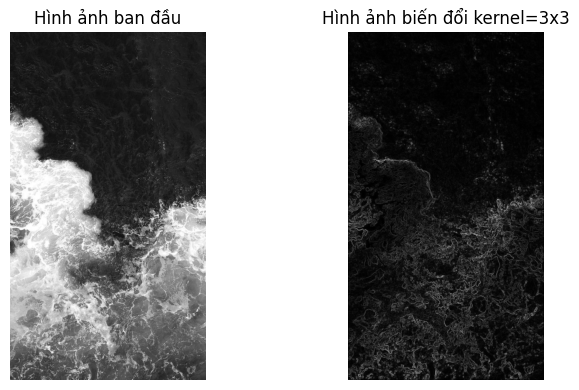

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

input_image=Image.open("/content/sobel.jpg").convert('L')
grayscale_image = np.array(input_image)

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)
sobel_filtered_image = np.zeros(shape=(rows, columns))

for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Hình ảnh ban đầu')
plt.imshow(input_image,cmap='gray')
plt.axis('off')

# Hiển thị hình ảnh biến đổi
plt.subplot(1, 2, 2)
plt.title(f'Hình ảnh biến đổi kernel=3x3')
plt.imshow(sobel_filtered_image,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Lọc trung bình

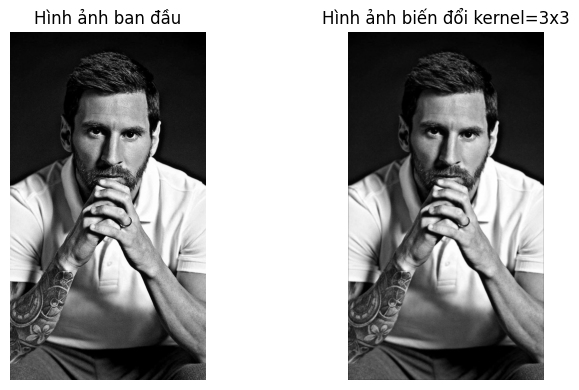

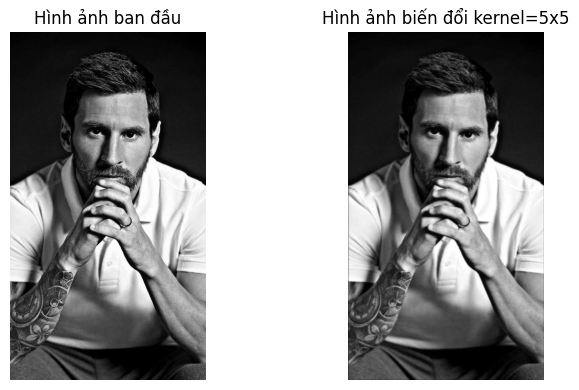

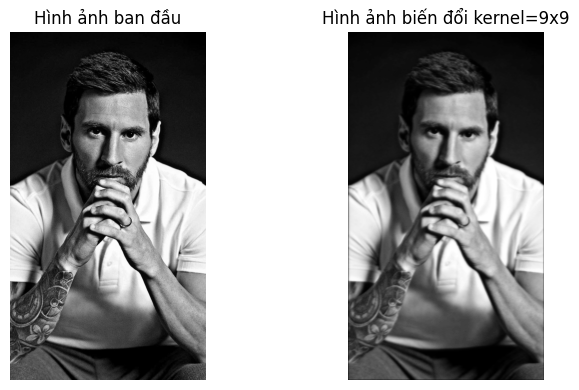

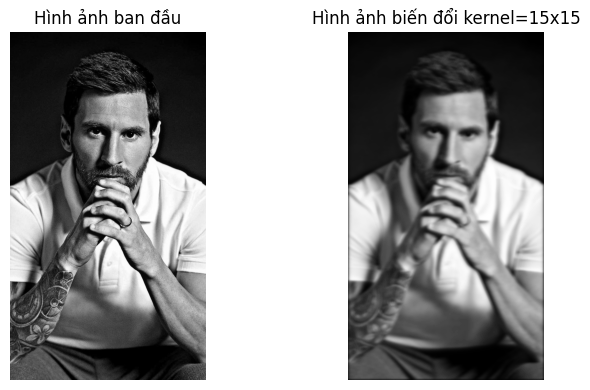

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def transform(img,kernel):
    # Lấy kích thước ảnh
    width, height = img.size

    # Duyệt qua từng pixel và thực hiện
    for y in range(height):
        for x in range(width):
            sum=0
            # Tính giá trị mới
            for y1 in range(-int(kernel/2),int(round(kernel/2))):
                for x1 in range(-int(kernel/2),int(round(kernel/2))):
                    if(x+x1>=0 and y+y1>=0 and x+x1<width and y+y1<height):
                        sum+=img.getpixel((x+x1, y+y1))
            new_color = round(sum/(kernel*kernel))

            # Đặt lại giá trị pixel mới
            img.putpixel((x, y), new_color)

    # Lưu hình ảnh mới
    return img

def plot(image_path,kernel=3):
    # Đọc hình ảnh
    img = Image.open(image_path)
    img = img.convert('L')

    # Hiển thị hình ảnh ban đầu
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Hình ảnh ban đầu')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    # Thực hiện phép biến đổi
    img = transform(img,kernel)

    # Hiển thị hình ảnh biến đổi
    plt.subplot(1, 2, 2)
    plt.title(f'Hình ảnh biến đổi kernel={kernel}x{kernel}')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

plot("/content/loc_trung_binh.jpg",kernel=3)
plot("/content/loc_trung_binh.jpg",kernel=5)
plot("/content/loc_trung_binh.jpg",kernel=9)
plot("/content/loc_trung_binh.jpg",kernel=15)

Lọc trung vị

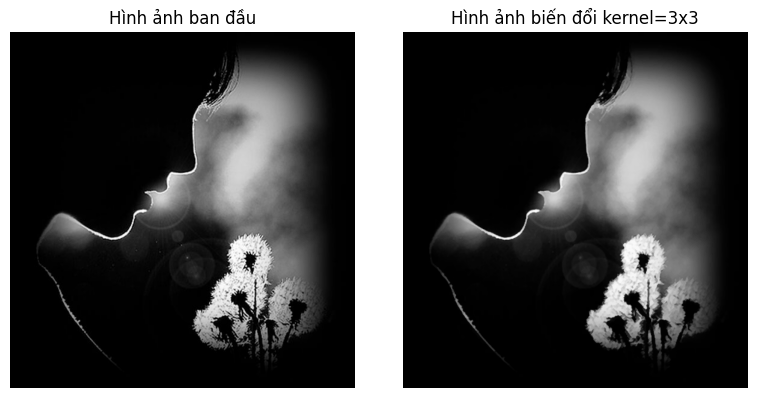

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

def transform(img,kernel):
    # Lấy kích thước ảnh
    width, height = img.size

    # Duyệt qua từng pixel và thực hiện
    for y in range(height):
        for x in range(width):
            arr=[]
            # Tính giá trị mới
            for y1 in range(-int(kernel/2),int(round(kernel/2))):
                for x1 in range(-int(kernel/2),int(round(kernel/2))):
                    if(x+x1>=0 and y+y1>=0 and x+x1<width and y+y1<height):
                        arr.append(img.getpixel((x+x1, y+y1)))
                    else: arr.append(0)
            new_color = sorted(arr)[int(len(arr)/2)]
            # Đặt lại giá trị pixel mới
            img.putpixel((x, y), new_color)

    # Lưu hình ảnh mới
    return img

def plot(image_path,kernel=3):
    # Đọc hình ảnh
    img = Image.open(image_path)
    img = img.convert('L')

    # Hiển thị hình ảnh ban đầu
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Hình ảnh ban đầu')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    # Thực hiện phép biến đổi
    img = transform(img,kernel)

    # Hiển thị hình ảnh biến đổi
    plt.subplot(1, 2, 2)
    plt.title(f'Hình ảnh biến đổi kernel={kernel}x{kernel}')
    plt.imshow(img,cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

plot("/content/loc_trung_vi.jpg",kernel=3)

Laplacian

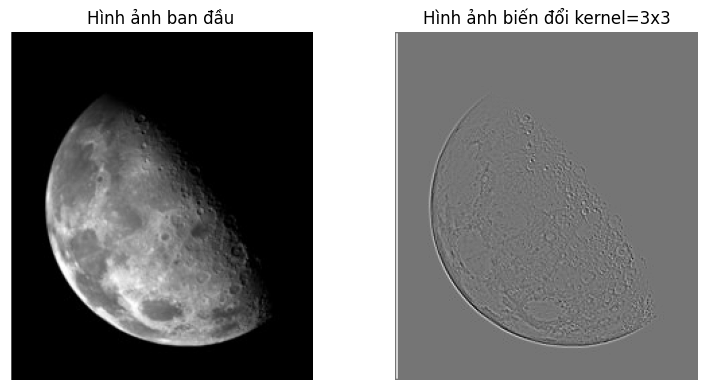

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

input_image=Image.open("/content/moon.jpg").convert('L')
grayscale_image = np.array(input_image)

Laplacian = np.array([[0.0, 1.0, 0.0], [1.0, -4.0, 1.0], [0.0, 1.0, 0.0]])
[rows, columns] = np.shape(grayscale_image)
Laplacian_filtered_image = np.zeros(shape=(rows, columns))

for i in range(rows - 2):
    for j in range(columns - 2):
        Laplacian_filtered_image[i + 1, j + 1] = np.sum(np.multiply(Laplacian, grayscale_image[i:i + 3, j:j + 3]))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Hình ảnh ban đầu')
plt.imshow(input_image,cmap='gray')
plt.axis('off')

# Hiển thị hình ảnh biến đổi
plt.subplot(1, 2, 2)
plt.title(f'Hình ảnh biến đổi kernel=3x3')
plt.imshow(Laplacian_filtered_image,cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()